In [ ]:
# Install necessary libraries
!pip install kafka-python scikit-learn pandas numpy matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Kafka Library
from kafka import KafkaProducer, KafkaConsumer
import json

In [ ]:
# Load the heart disease dataset from a local file or Kaggle
data_url = "/heart_disease_risk_dataset_earlymed.csv"
df = pd.read_csv(data_url)

# Display the first few rows
df.head()


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


**Exploratory Data Analysis (EDA)**

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64
         Chest_Pain  Shortness_of_Breath       Fatigue  Palpitations  \
count  70000.000000         70000.000000  70000.000000  70000.000000   
mean       0.499229             0.500586      0.498571      0.498729   
std        0.500003             0.500003      0.500002      0.500002   
min        0.000000             0.000000      0.000000      0.000000   
25%        0.000000             0.000000      0.000000      0.000000   
50%        0.000000             1.000000      0.000000      0.000000   
75%     

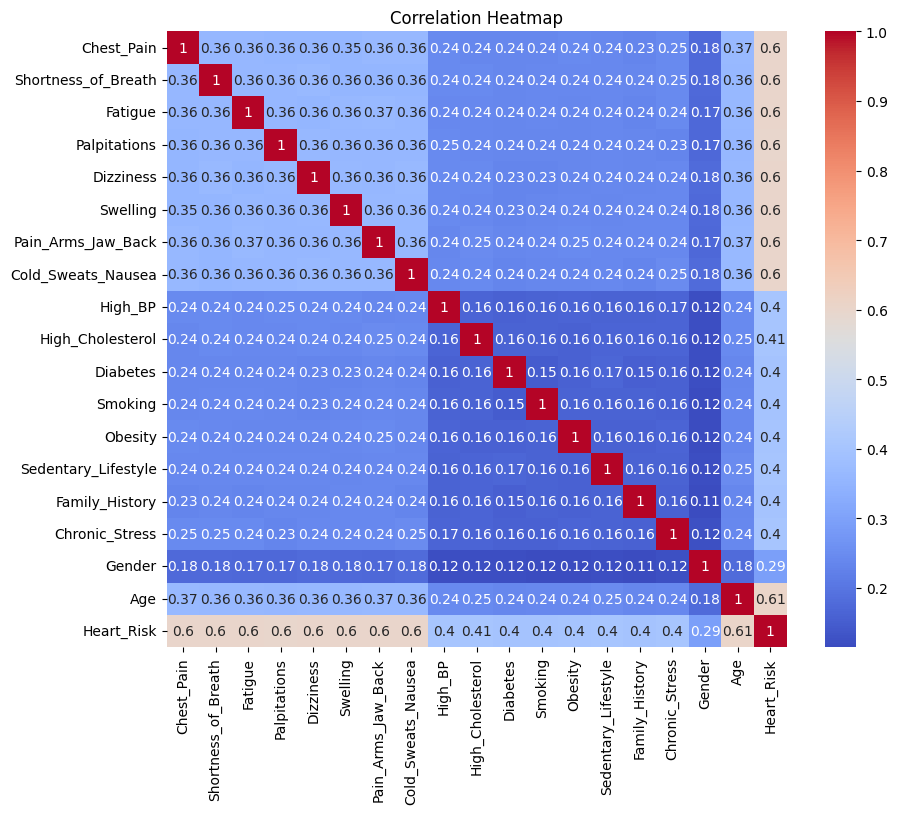

In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Basic statistical analysis
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
print(df.columns)

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk'],
      dtype='object')


**Data Preprocessing**

In [ ]:
# Feature and label separation
X = df.drop('Heart_Risk', axis=1)  # Features
y = df['Heart_Risk']               # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing data (Optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ** bold textUse Pyspark for data cleaning **

In [ ]:
from pyspark.sql import SparkSession

# SparkSession Create
spark = SparkSession.builder \
        .appName("Remove Duplicates") \
        .getOrCreate()

# data load
df = spark.read.csv('/heart_disease_risk_dataset_earlymed.csv', header=True, inferSchema=True)

# duplicate deduction
df_cleaned = df.dropDuplicates()

# for fixed column
df_cleaned = df.dropDuplicates(['Chest_Pain'])



**Model Training (Random Forest, SVM, XGBoost)**

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Accuracy Comparison
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


Random Forest Accuracy: 0.9917142857142857
SVM Accuracy: 0.9907142857142858
XGBoost Accuracy: 0.9922142857142857


# **Model Evaluation**

Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6998
         1.0       0.99      0.99      0.99      7002

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion Matrix:


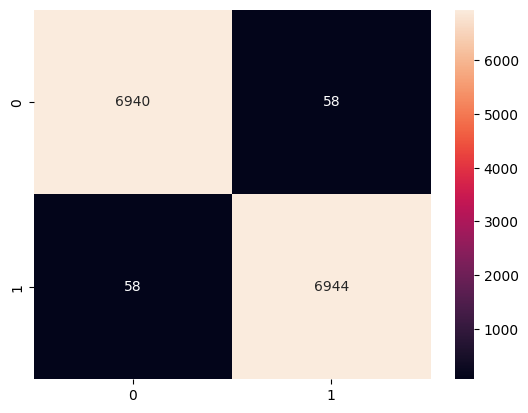

In [ ]:
# Classification report and confusion matrix
print("Random Forest Report:")
print(classification_report(y_test, rf_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d")
plt.show()


# **Kafka Integration (Stream Data)**

Kafka Producer (Data Stream)

In [ ]:
# Kafka producer to send data
producer = KafkaProducer(
    bootstrap_servers=['localhost:9092'],
    value_serializer=lambda v: json.dumps(v).encode('utf-8')
)

# Sending data to Kafka topic
for index, row in df.iterrows():
    producer.send('heart_disease', row.to_dict())
    print(f"Sent: {row.to_dict()}")


ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-producer-1, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv4 ('127.0.0.1', 9092)]>: Connect attempt returned error 111. Disconnecting.
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-producer-1, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv4 ('127.0.0.1', 9092)]>: Closing connection. KafkaConnectionError: 111 ECONNREFUSED
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-producer-1, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv6 ('::1', 9092, 0, 0)]>: Connect attempt returned error 99. Disconnecting.
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-producer-1, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv6 ('::1', 9092, 0, 0)]>: Closing connection. KafkaConnectionError: 99 EADDRNOTAVAIL
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-producer-1, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv4 ('127.0.0.1', 9092)]>: Connect attempt retur

NoBrokersAvailable: NoBrokersAvailable

**Kafka Consumer (Receive Data)**

In [ ]:
# Kafka consumer to receive data
consumer = KafkaConsumer(
    'heart_disease',
    bootstrap_servers=['localhost:9092'],
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

for message in consumer:
    print(f"Received: {message.value}")


ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.4, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv4 ('127.0.0.1', 9092)]>: Connect attempt returned error 111. Disconnecting.
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.4, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv4 ('127.0.0.1', 9092)]>: Closing connection. KafkaConnectionError: 111 ECONNREFUSED
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.4, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv6 ('::1', 9092, 0, 0)]>: Connect attempt returned error 99. Disconnecting.
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.4, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv6 ('::1', 9092, 0, 0)]>: Closing connection. KafkaConnectionError: 99 EADDRNOTAVAIL
ERROR:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.4, node_id=bootstrap-0 host=localhost:9092 <connecting> [IPv4 ('127.0.0.1', 9092)]>: Connect attempt returned error 111. Disconnect

NoBrokersAvailable: NoBrokersAvailable

Model Deployment (Optional)

In [ ]:
# Save the model
import joblib
joblib.dump(rf, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

PySpark DataFrame to Pandas DataFrame For Visualization

In [ ]:
df_pandas = df.toPandas()

data save for power BI

In [ ]:
df_pandas.to_csv('/content/heart_disease_risk_dataset_earlymed.csv', index=False)

save to local pc

In [ ]:
from google.colab import files
files.download('/content/heart_disease_risk_dataset_earlymed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>